### Installation and Setup


In [ ]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))

GPU: []
Num GPUs: 0


In [ ]:
print(tf.__version__)

2.14.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

In [ ]:
#loading dataset
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
np.max(x_train),np.min(x_train),np.mean(x_train)

(255, 0, 72.94035223214286)

In [ ]:
np.max(y_train),np.min(y_train),np.mean(y_train)

(9, 0, 4.5)

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat','5 Sandal', '6 Shirt','7 Sneaker','8 Bag','9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


# Data Exploration

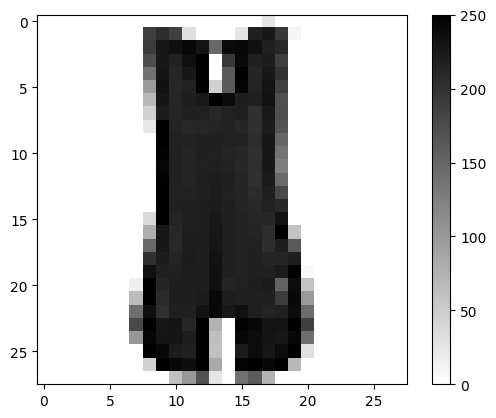

In [ ]:
# plt.figure
# # # Create a custom colormap with two colors
# # custom_cmap = plt.cm.colors.ListedColormap(['blue', 'red'])

# # # Set the range of values for the colormap normalization
# # # In this case, we want 0 to be mapped to blue and 250 to be mapped to red
# # bounds = [0, 250]



# # Plot the image with the custom colormap
# plt.imshow(x_train[4])

# plt.colorbar()


import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the colormap
colors = ['white', 'black']

# Create a colormap with a smooth transition from blue to red
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Assuming x_train[4] is your image array
image = x_train[4]

# Set the range of values for the colormap normalization
vmin, vmax = 0, 250

# Plot the image with the custom colormap
plt.imshow(x_train[4], cmap=custom_cmap, vmin=vmin, vmax=vmax)

# Add a colorbar for reference
plt.colorbar()

# Show the plot
plt.show()


In [ ]:
y_train[4]

0

In [ ]:
#flattening the dataset
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [ ]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# Building the Model

In [ ]:
#Define an object
model = tf.keras.models.Sequential()
# sequence of layers for a connected nerual network

In [ ]:
#Adding first fully connected layer
#relu introduces non-linearity to the system
#784 as we saw earlier
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape = (784,)))

In [ ]:
#adding second layer with dropout
model.add(tf.keras.layers.Dropout(0.3))
#regularisation technique, prevents overfitting

In [ ]:
#Adding output layer
#units = 10, cause 10 classes, activation func = soft max cause multiple classes, sigmoid for binary
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

# Training the model

In [ ]:
#compiling the model
#optimizer = adam(minimizes loss function)
#lossfunction = sparse_categorical_crossentropy(acts as guide to optimizer)
#metrics = sparse_categorial_accuracy
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['sparse_categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 2.8179 - sparse_categorical_accuracy: 0.5583
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.0551 - sparse_categorical_accuracy: 0.6141
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0012 - sparse_categorical_accuracy: 0.6288
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9917 - sparse_categorical_accuracy: 0.6318
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9672 - sparse_categorical_accuracy: 0.6342
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9459 - sparse_categorical_accuracy: 0.6393
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.9561 - sparse_categorical_accuracy: 0.6342
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9101 - sparse_categorical_accuracy: 0.6477
Epoch 9/10
1875/1875 [======

#Model Evaluation and Prediction

In [ ]:
#Model Evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7282 - sparse_categorical_accuracy: 0.7278


In [ ]:
print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.7278000116348267


In [ ]:
#Model Prediction
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)


313/313 [==============================] - 1s 2ms/step


In [ ]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [ ]:
y_pred[0] #predicted output

9

In [ ]:
y_test[0] #actual output

9

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[670   3  76  56   4   0 186   0   5   0]
 [  0 948  12  33   2   0   3   0   2   0]
 [  3   2 966   7   4   0  17   0   1   0]
 [ 10  13  61 842   5   0  68   0   1   0]
 [  0   0 931  27   7   3  31   0   1   0]
 [  0   0   1   0   0 866   0  54   2  77]
 [ 92   1 665  33   3   0 202   0   4   0]
 [  0   0   0   0   0  13   0 936   1  50]
 [  1   1  67   9   0   1  27   4 888   2]
 [  0   0   0   0   0   1   1  45   0 953]]


In [ ]:
acc_cm = accuracy_score(y_test,y_pred)
print(acc_cm)

0.7278
